In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

#### Let's load the Nashville zipcode data and look at the first few rows
- geopandas reads files with the `read_file()` method
- The zipcode data was downloaded from https://data.nashville.gov/General-Government/Zip-Codes/u7r5-bpku


In [3]:
zipcodes = gpd.read_file('../data/zipcodes.geojson')
print(zipcodes.crs)
zipcodes.head( )

EPSG:4326


,zip,objectid,po_name,shape_stlength,shape_starea,geometry
0,37115,1,MADISON,178783.02488886821,596553400.57885742,"MULTIPOLYGON (((-86.68725 36.31821, -86.68722 ..."
1,37216,3,NASHVILLE,75820.997821400058,188884682.28344727,"MULTIPOLYGON (((-86.73451 36.23774, -86.73425 ..."
2,37204,9,NASHVILLE,93180.292250425613,200664795.51708984,"MULTIPOLYGON (((-86.77914 36.13424, -86.77923 ..."
3,37027,11,BRENTWOOD,159760.6942933173,174978422.04101562,"MULTIPOLYGON (((-86.81258 36.06319, -86.81263 ..."
4,37064,18,FRANKLIN,28995.828320601937,46969608.005737305,"MULTIPOLYGON (((-87.02197 36.01200, -87.02140 ..."


In [4]:
type(zipcodes)

geopandas.geodataframe.GeoDataFrame

#### Now let's look at the difference between calling the first geometry variable.....


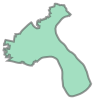

In [6]:
zipcodes.loc[0, 'geometry']

#### ...and printing it


In [8]:
print(zipcodes.loc[0, 'geometry'])

MULTIPOLYGON (((-86.68724897141 36.318212121092, -86.687216475338 36.318210560887, -86.687181702435 36.318208780693, -86.687146962761 36.318206917893, -86.687112187256 36.318205000347, -86.687077445444 36.318202972151, -86.687042702928 36.318200862685, -86.687034690751 36.318200362824, -86.687007959928 36.318198697129, -86.68697325063 36.318196422067, -86.686938539918 36.318194065167, -86.686903827781 36.318191625285, -86.68686914958 36.318189102792, -86.686834437433 36.318186498074, -86.6867997571 36.318183810757, -86.686765111412 36.318181040826, -86.686730430357 36.318178188106, -86.686695782299 36.318175225883, -86.68666116771 36.318172208522, -86.686626552408 36.318169108746, -86.686591935688 36.318165926561, -86.686557318725 36.318162634491, -86.686522735235 36.318159287854, -86.686488151499 36.318155830759, -86.686453600524 36.318152318529, -86.68641904813 36.31814872389, -86.68638449549 36.318145018792, -86.686349976324 36.318141259129, -86.68631549015 36.318137389391, -86.6862

#### Plotting a GeoDataFrame is as easy as calling the GeoPandas .plot() function


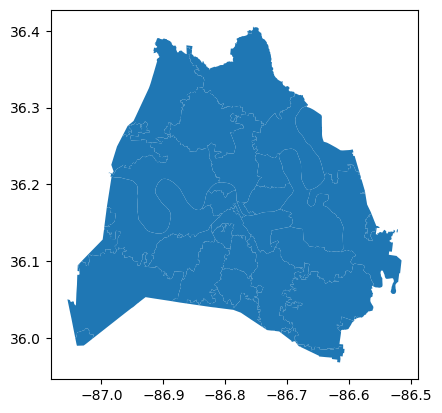

In [10]:
zipcodes.plot();

#### Add information and styling 
- set the `column =` to a column in the GeoDataFrame to color by
- change the [colormap](https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html) 
- pass in keywords to tweak the legend created by [`matplotib`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html)


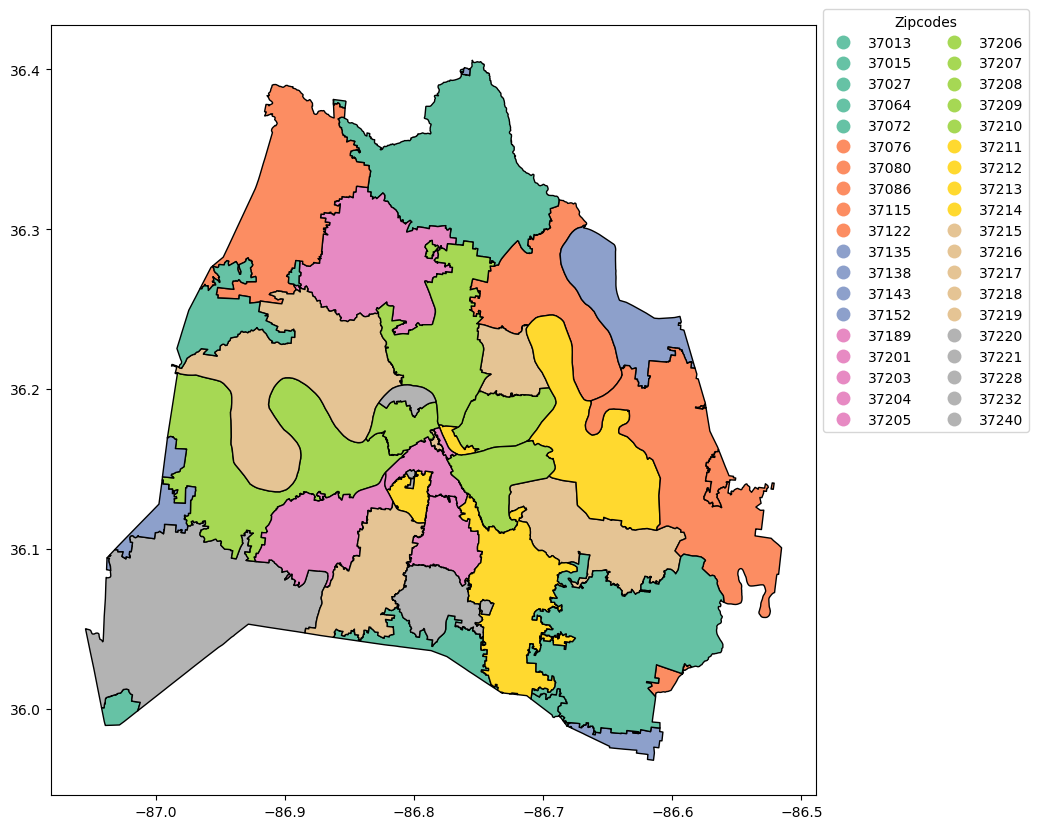

In [12]:
#geopandas will take care of legend styling if you pass a dict of keywords

leg_kwds = {'title': 'Zipcodes', 'loc': 'upper left', 
            'bbox_to_anchor': (1, 1.03), 'ncol': 2}

zipcodes.plot(column = 'zip', figsize=(10, 10),
              edgecolor = 'black',
              legend = True, legend_kwds = leg_kwds, 
              cmap = 'Set2')
plt.show()

#### Next you will read in the library data
- downloaded fromhttps://data.nashville.gov/datasets/a2e6fec78d0f42caa1229492ca4aa2b1_0/explore
- cleaned:
    - rename columns 
    - drop unwanted columns 
    - parse `lat` and `lng` columns from `location`
- print the shape 
- take a look at the first 3 rows

In [14]:
library = pd.read_csv('../data/Library_Facilities.csv')
print(library.shape)
library.head(3)

(21, 45)


,Facility Name,GLOBALID,Address,City,Zip Code,Phone Number,created_user,created_date,last_edited_user,last_edited_date,...,Wireless?,Group Study?,Copy Machines?,Seed Exchange?,Studio NPL?,Restrooms?,Book Drop?,Notes,x,y
0,Edgehill,babeb9d5-d990-422a-b9e3-07e258429be0,1409 12th Ave S,Nashville,37203,615-862-5861,CollaborationAdminNashville,12/16/2024 7:26:53 PM,CollaborationAdminNashville,12/16/2024 7:26:53 PM,...,Yes,No,Yes,Yes,No,Yes,Yes,Closed on Friday and Sunday. Call library to ...,1.735791e+06,658389.481250
1,Bellevue,1591103c-a036-4beb-a66c-bbb465ce0be3,720 Baugh Rd,Nashville,37221,615-862-5854,CollaborationAdminNashville,12/16/2024 7:26:53 PM,CollaborationAdminNashville,12/16/2024 7:26:53 PM,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Call library to confirm hours on holidays and ...,1.691685e+06,633346.402500
2,Bordeaux,f3311995-fe56-417b-8804-f56a629eed7a,4000 Clarksville Pike,Nashville,37218,615-862-5856,CollaborationAdminNashville,12/16/2024 7:26:53 PM,CollaborationAdminNashville,12/16/2024 7:26:53 PM,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Call library to confirm hours on holidays and ...,1.721284e+06,684690.565833


In [15]:
library_gis = gpd.read_file('../data/Library_Facilities.geojson')

In [16]:
library_gis.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 44 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   FacilityName      21 non-null     object  
 1   GLOBALID          21 non-null     object  
 2   Address           21 non-null     object  
 3   City              21 non-null     object  
 4   ZipCode           21 non-null     object  
 5   PhoneNumber       21 non-null     object  
 6   created_user      21 non-null     object  
 7   created_date      21 non-null     object  
 8   last_edited_user  21 non-null     object  
 9   last_edited_date  21 non-null     object  
 10  OBJECTID          21 non-null     int64   
 11  PhotoURL          21 non-null     object  
 12  BusRoute          20 non-null     object  
 13  MondayOpen        21 non-null     object  
 14  MondayClose       21 non-null     object  
 15  TuesdayOpen       21 non-null     object  
 16  TuesdayClose      21

- you want the CRS for the library to match the CRS in the zipcodes GeoDataFrame 


In [18]:
library_clean = library_gis[["FacilityName", "Address", "City", "ZipCode", "geometry"]]
library_clean

,FacilityName,Address,City,ZipCode,geometry
0,Edgehill,1409 12th Ave S,Nashville,37203,POINT (-86.78811 36.13949)
1,Bellevue,720 Baugh Rd,Nashville,37221,POINT (-86.93666 36.06963)
2,Bordeaux,4000 Clarksville Pike,Nashville,37218,POINT (-86.83800 36.21141)
3,East,206 Gallatin Rd,Nashville,37206,POINT (-86.75021 36.17896)
4,Edmondson Pike,5501 Edmondson Pike,Nashville,37211,POINT (-86.74529 36.04495)
5,Goodlettsville,205 Rivergate Pkwy,Goodlettsville,37072,POINT (-86.71077 36.31467)
6,Green Hills,3701 Benham Ave,Nashville,37215,POINT (-86.80917 36.10979)
7,Hadley Park,1039 28th Ave N,Nashville,37208,POINT (-86.82084 36.16682)
8,Hermitage,3700 James Kay Ln,Hermitage,37076,POINT (-86.61508 36.17757)
9,Inglewood,4312 Gallatin Road,Nashville,37216,POINT (-86.72499 36.22584)


In [19]:
zipcodes.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

#### The `GeoDataFrame()` constructor needs 3 parameters:
 - a DataFrame
 - a coordinate reference system
 - a geometry (we will use the geopandas `points_from_xy()` method to create a Point geometry)

In [21]:
zipcodes

,zip,objectid,po_name,shape_stlength,shape_starea,geometry
0,37115,1,MADISON,178783.02488886821,596553400.57885742,"MULTIPOLYGON (((-86.68725 36.31821, -86.68722 ..."
1,37216,3,NASHVILLE,75820.997821400058,188884682.28344727,"MULTIPOLYGON (((-86.73451 36.23774, -86.73425 ..."
2,37204,9,NASHVILLE,93180.292250425613,200664795.51708984,"MULTIPOLYGON (((-86.77914 36.13424, -86.77923 ..."
3,37027,11,BRENTWOOD,159760.6942933173,174978422.04101562,"MULTIPOLYGON (((-86.81258 36.06319, -86.81263 ..."
4,37064,18,FRANKLIN,28995.828320601937,46969608.005737305,"MULTIPOLYGON (((-87.02197 36.01200, -87.02140 ..."
5,37143,23,PEGRAM,7047.8267580476522,1900364.756652832,"MULTIPOLYGON (((-87.03553 36.08659, -87.03556 ..."
6,37080,42,JOELTON,2319.8074237329579,56522.611450195313,"MULTIPOLYGON (((-86.86263 36.37811, -86.86264 ..."
7,37221,17,NASHVILLE,241372.3112694624,1266395059.4877319,"MULTIPOLYGON (((-86.97084 36.11644, -86.97084 ..."
8,37072,47,GOODLETTSVILLE,225242.45424953851,1094968706.7701416,"MULTIPOLYGON (((-86.75361 36.40428, -86.75354 ..."
9,37212,54,NASHVILLE,58759.243654332378,73920091.147705078,"MULTIPOLYGON (((-86.80790 36.14643, -86.80605 ..."


#### Now you are ready to combine library and zipcodes with a spatial join
- first a little clean up for the zipcodes
    - just keep the zip, po_name, and geometry columns
- then construct the join 
    - keep in mind that you want to find the **library within a zip code polygon**
    - the geometry for the new (combined) GeoDataFrame comes from the left GeoDataFrame


In [23]:
# split column
library_clean['lng'] = library_clean.geometry.x
library_clean['lat'] = library_clean.geometry.y
library_clean

C:\Users\janvi\anaconda3\envs\geospatial\lib\site-packages\geopandas\geodataframe.py:1525: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
C:\Users\janvi\anaconda3\envs\geospatial\lib\site-packages\geopandas\geodataframe.py:1525: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


,FacilityName,Address,City,ZipCode,geometry,lng,lat
0,Edgehill,1409 12th Ave S,Nashville,37203,POINT (-86.78811 36.13949),-86.788113,36.139490
1,Bellevue,720 Baugh Rd,Nashville,37221,POINT (-86.93666 36.06963),-86.936664,36.069631
2,Bordeaux,4000 Clarksville Pike,Nashville,37218,POINT (-86.83800 36.21141),-86.838003,36.211405
3,East,206 Gallatin Rd,Nashville,37206,POINT (-86.75021 36.17896),-86.750207,36.178958
4,Edmondson Pike,5501 Edmondson Pike,Nashville,37211,POINT (-86.74529 36.04495),-86.745288,36.044955
5,Goodlettsville,205 Rivergate Pkwy,Goodlettsville,37072,POINT (-86.71077 36.31467),-86.710766,36.314667
6,Green Hills,3701 Benham Ave,Nashville,37215,POINT (-86.80917 36.10979),-86.809165,36.109785
7,Hadley Park,1039 28th Ave N,Nashville,37208,POINT (-86.82084 36.16682),-86.820837,36.166815
8,Hermitage,3700 James Kay Ln,Hermitage,37076,POINT (-86.61508 36.17757),-86.615082,36.177569
9,Inglewood,4312 Gallatin Road,Nashville,37216,POINT (-86.72499 36.22584),-86.724993,36.225839


In [24]:
library_geo = gpd.GeoDataFrame(library_clean, 
                           crs = zipcodes.crs, 
                           geometry = gpd.points_from_xy(library_clean.lng, library_clean.lat))
library_geo

,FacilityName,Address,City,ZipCode,geometry,lng,lat
0,Edgehill,1409 12th Ave S,Nashville,37203,POINT (-86.78811 36.13949),-86.788113,36.139490
1,Bellevue,720 Baugh Rd,Nashville,37221,POINT (-86.93666 36.06963),-86.936664,36.069631
2,Bordeaux,4000 Clarksville Pike,Nashville,37218,POINT (-86.83800 36.21141),-86.838003,36.211405
3,East,206 Gallatin Rd,Nashville,37206,POINT (-86.75021 36.17896),-86.750207,36.178958
4,Edmondson Pike,5501 Edmondson Pike,Nashville,37211,POINT (-86.74529 36.04495),-86.745288,36.044955
5,Goodlettsville,205 Rivergate Pkwy,Goodlettsville,37072,POINT (-86.71077 36.31467),-86.710766,36.314667
6,Green Hills,3701 Benham Ave,Nashville,37215,POINT (-86.80917 36.10979),-86.809165,36.109785
7,Hadley Park,1039 28th Ave N,Nashville,37208,POINT (-86.82084 36.16682),-86.820837,36.166815
8,Hermitage,3700 James Kay Ln,Hermitage,37076,POINT (-86.61508 36.17757),-86.615082,36.177569
9,Inglewood,4312 Gallatin Road,Nashville,37216,POINT (-86.72499 36.22584),-86.724993,36.225839


In [25]:
zipcodes = zipcodes[['zip', 'po_name', 'geometry']]

In [26]:
library_by_zip = gpd.sjoin(library_clean, zipcodes, predicate = 'within')

In [27]:
library_by_zip

,FacilityName,Address,City,ZipCode,geometry,lng,lat,index_right,zip,po_name
0,Edgehill,1409 12th Ave S,Nashville,37203,POINT (-86.78811 36.13949),-86.788113,36.139490,35,37203,NASHVILLE
1,Bellevue,720 Baugh Rd,Nashville,37221,POINT (-86.93666 36.06963),-86.936664,36.069631,7,37221,NASHVILLE
2,Bordeaux,4000 Clarksville Pike,Nashville,37218,POINT (-86.83800 36.21141),-86.838003,36.211405,27,37218,NASHVILLE
3,East,206 Gallatin Rd,Nashville,37206,POINT (-86.75021 36.17896),-86.750207,36.178958,13,37206,NASHVILLE
4,Edmondson Pike,5501 Edmondson Pike,Nashville,37211,POINT (-86.74529 36.04495),-86.745288,36.044955,49,37211,NASHVILLE
5,Goodlettsville,205 Rivergate Pkwy,Goodlettsville,37072,POINT (-86.71077 36.31467),-86.710766,36.314667,8,37072,GOODLETTSVILLE
6,Green Hills,3701 Benham Ave,Nashville,37215,POINT (-86.80917 36.10979),-86.809165,36.109785,44,37215,NASHVILLE
7,Hadley Park,1039 28th Ave N,Nashville,37208,POINT (-86.82084 36.16682),-86.820837,36.166815,40,37208,NASHVILLE
8,Hermitage,3700 James Kay Ln,Hermitage,37076,POINT (-86.61508 36.17757),-86.615082,36.177569,46,37076,HERMITAGE
9,Inglewood,4312 Gallatin Road,Nashville,37216,POINT (-86.72499 36.22584),-86.724993,36.225839,1,37216,NASHVILLE


#### Now that the data is joined spatially you can count the library by zip code  and see how many Facilities are within each polygon 
- using the `value_counts()` method


In [29]:
library_by_zip['zip'].value_counts()

zip
37203    2
37211    2
37208    2
37228    1
37214    1
37013    1
37209    1
37210    1
37138    1
37115    1
37216    1
37221    1
37076    1
37215    1
37072    1
37206    1
37218    1
37219    1
Name: count, dtype: int64

#### Let's take a closer look at the 2 facilities in the 37211 zip code
- filter the library_by_zip data to just get library in 37211
- filter the zip code geodataframe to just the polygon (row) for 37211


In [31]:
library_in_37211 = library_by_zip.loc[library_by_zip['zip'] == '37211']
library_in_37211.shape

(2, 10)

In [32]:
library_in_37211

,FacilityName,Address,City,ZipCode,geometry,lng,lat,index_right,zip,po_name
4,Edmondson Pike,5501 Edmondson Pike,Nashville,37211,POINT (-86.74529 36.04495),-86.745288,36.044955,49,37211,NASHVILLE
17,Thompson Lane,380 Thompson Ln,Nashville,37211,POINT (-86.74327 36.11119),-86.743267,36.111188,49,37211,NASHVILLE


In [33]:
polygon37211 = zipcodes.loc[zipcodes['zip'] == '37211']
polygon37211.shape
polygon37211

,zip,po_name,geometry
49,37211,NASHVILLE,"MULTIPOLYGON (((-86.75696 36.13189, -86.75693 ..."


#### Now plot these two together
- first plot the polygons for 37211 and make them light green
- next plot the points for the library and color them by Facility

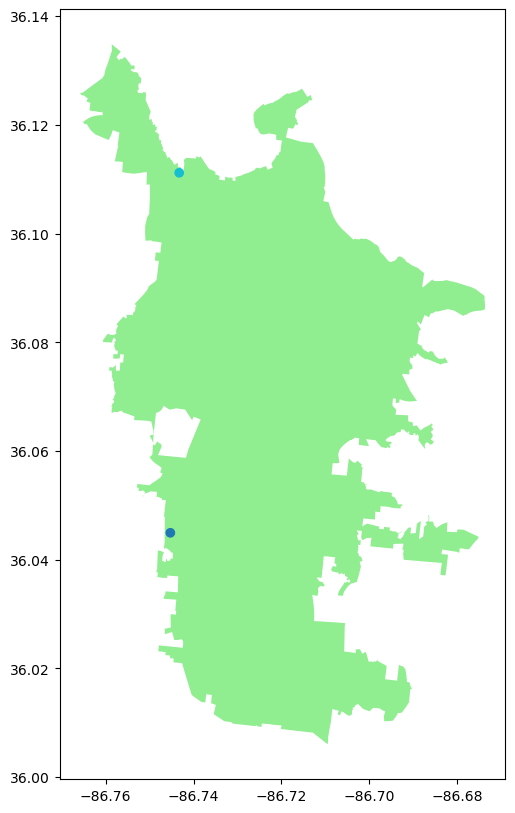

In [35]:
#fig, ax = matplotlib.subplots()
ax = polygon37211.plot(figsize = (8, 10), color = 'lightgreen')
library_in_37211.plot( ax = ax, column = 'FacilityName');
plt.show();

#### We're getting there! It would be helpful to have streets, though wouldn't it? We can add a street map with the folium package.

#### folium maps require a center point for the street map. 
- Make use of a GeoSeries attribute (.centroid) which gives the center of a polygon
- Since there are two polygons which should we use?

In [38]:
polygon37211.geometry.centroid

C:\Users\janvi\AppData\Local\Temp\ipykernel_6188\2670406774.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  polygon37211.geometry.centroid


49    POINT (-86.72308 36.06711)
dtype: geometry

In [39]:
#find the center of the larger (more southern) polygon and look at it
center = polygon37211.geometry.centroid[49]
print(center)

POINT (-86.72307880301152 36.06711142916258)


C:\Users\janvi\AppData\Local\Temp\ipykernel_6188\859877743.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  center = polygon37211.geometry.centroid[49]


#### Folium requires a location point as an array 
- with *latitude* first
- but shapely Points have *longitude* first 

In [41]:
# reverse the order when constructing the array for folium location
area_center = [center.y, center.x]

# check the order of area_center, the location for our folium map
print(area_center)

[36.06711142916258, -86.72307880301152]


#### To create a folium map just call the folium `Map()` constructor
- `location` is the only argument required by the constructor
    - Set `area_center` as the `location` of the folium map. 
- `zoom_start` is an optional argument 
    - A setting of 12 should get us nice and close

In [43]:
#create our map of Nashville Zip Code 37211 and show it
map_37211 = folium.Map(location =  area_center, zoom_start = 12)
map_37211

#### Next, let's add our 37211 polygon and library markers.

#### `itterows()` is a generator that iterates through the rows of a DataFrame and returns a tuple with the row id and row values. 
- Below, we are printing the row values for the first 3 row as we iterate through the GeoDataFrame of library in 37207. 
- This idea will be helpful for creating our markers!

In [46]:
i = 0
for row_index, row_values in library_in_37211.iterrows():
    if i <3: 
        print('index is', row_index)
        print('values are:')
        print(' ')
        print(row_values)
        print('------------------------- ')
        i+=1

index is 4
values are:
 
FacilityName                               Edmondson Pike
Address                               5501 Edmondson Pike
City                                            Nashville
ZipCode                                             37211
geometry        POINT (-86.745288310644 36.0449547782825)
lng                                            -86.745288
lat                                             36.044955
index_right                                            49
zip                                                 37211
po_name                                         NASHVILLE
Name: 4, dtype: object
------------------------- 
index is 17
values are:
 
FacilityName                                 Thompson Lane
Address                                    380 Thompson Ln
City                                             Nashville
ZipCode                                              37211
geometry        POINT (-86.7432668390393 36.1111884758873)
lng                     

#### Create map_37211 again with additional features:
- add the zipcode area outline (polygon_37211)
- iterate through the library_in_37211to
    - create location from each lat and lng
    - create a popup from the FacilityName column
    - create a custom icon if you want with [font-awesome](https://fontawesome.com/v4.7.0/icons/)
    - build a marker from each location and popup and (optionally) your custom icon 
    - add the marker to  `map_37211`
- display `map_37211`

In [48]:
library_in_37211[['lat','lng']].dtypes

lat    float64
lng    float64
dtype: object

In [49]:
library_in_37211[['lat','lng']].head()

,lat,lng
4,36.044955,-86.745288
17,36.111188,-86.743267


In [50]:
#draw our zip code area: 37211
map_37211 = folium.Map(location =  area_center, zoom_start = 12)

folium.GeoJson(polygon37211).add_to(map_37211)

#iterate through library_in_37211 to create locations and markers 
#for each FacilityName
#remember for Folium locations, lat is listed first!!

for row_index, row_values in library_in_37211.iterrows():
    loc = [row_values['lat'], row_values['lng']]
    pop = str(row_values['FacilityName'])
    icon=folium.Icon(color="blue",icon="book", prefix='fa')
    
    marker = folium.Marker(
        location = loc, 
        popup = pop, icon = icon) 

    marker.add_to(map_37211)
map_37211.save('../maps/map37211.html')

#display our map
map_37211

#### If you have a lot of markers, you might want to use marker clusters
- Folium has `MarkerCluster()` and `FastMarkerCluster()`
- Construct a `MarkerCluster()` 
    - construct a `MarkerCluster()` and `.add_to()` the map
    - when you loop through the data and create markers add those to the marker cluster
- Construct a `FastMarkerCluster()` by passing a list of locations

#### You can save your map as an html file and it will retain the interactive qualities

In [53]:
folium.Map?

Init signature:
folium.Map(
    location: Optional[Sequence[float]] = None,
    width: Union[str, float] = '100%',
    height: Union[str, float] = '100%',
    left: Union[str, float] = '0%',
    top: Union[str, float] = '0%',
    position: str = 'relative',
    tiles: Union[str, folium.raster_layers.TileLayer, NoneType] = 'OpenStreetMap',
    attr: Optional[str] = None,
    min_zoom: int = 0,
    max_zoom: int = 18,
    zoom_start: int = 10,
    min_lat: int = -90,
    max_lat: int = 90,
    min_lon: int = -180,
    max_lon: int = 180,
    max_bounds: bool = False,
    crs: str = 'EPSG3857',
    control_scale: bool = False,
    prefer_canvas: bool = False,
    no_touch: bool = False,
    disable_3d: bool = False,
    png_enabled: bool = False,
    zoom_control: bool = True,
    **kwargs: Union[str, float, bool, Sequence, dict, NoneType],
)
Docstring:     
Create a Map with Folium and Leaflet.js

Generate a base map of given width and height with either default
tilesets or a custom tile

In [54]:
#draw our zip code area: 37211
map_37211 = folium.Map(location =  area_center, zoom_start = 12)

folium.GeoJson(polygon37211).add_to(map_37211)

#create a list of locations and pass them to FastMarkerCluster()
locations = library_in_37211[['lat', 'lng']].values.tolist()
map_37211.add_child(
    FastMarkerCluster(locations)
)



#display our map
map_37211

In [55]:
cluster_map_37211 = folium.Map(location =  area_center, zoom_start = 12)

#create a marker cluster
marker_cluster = MarkerCluster().add_to(cluster_map_37211)

folium.GeoJson(polygon37211).add_to(cluster_map_37211)

# inside the loop add each marker to the cluster
for row_index, row_values in library_in_37211.iterrows():
    loc = [row_values['lat'], row_values['lng']]
    pop = str(row_values['FacilityName'])
    icon=folium.Icon(color="blue",icon="book", prefix='fa')
    
    marker = folium.Marker(
        location = loc, 
        popup = pop,
    icon = icon) 
    
    marker.add_to(marker_cluster)

    
#save an interactive HTML map by calling .save()
cluster_map_37211.save('../maps/cluster37211.html')

cluster_map_37211